In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
def partial_dataset(my_dataset): #前後五筆資料
    return pd.concat([my_dataset.head(), my_dataset.tail()], axis=0)


In [3]:
ibm_prices_diffs_returns_week = pd.read_hdf('IBM.h5')

#日期範圍
start_date = ibm_prices_diffs_returns_week.index[0]
end_date = ibm_prices_diffs_returns_week.index[-1]
ibm_prices_diffs_returns_week

,High,Low,Open,Close,Volume,AdjClose,Scale,Net,D_High,D_Low,...,A_P_Close,S_P_Close,A_P_Volume,S_P_Volume,A_P_AdjClose,S_P_AdjClose,A_P_Scale,S_P_Scale,A_P_Net,S_P_Net
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,120.382408,117.629066,120.315491,118.489487,5417.443,111.285995,-1.826004,2.753342,-0.105164,-0.908218,...,0.004285,0.016602,0.106956,0.338041,0.004285,0.016602,-1.005684,1.259128,0.222653,0.800347
2021-01-05,121.108986,119.130020,119.512428,120.592735,6395.872,113.261375,1.080307,1.978966,0.726578,1.500954,...,0.004285,0.016602,0.106956,0.338041,0.004285,0.016602,-1.005684,1.259128,0.222653,0.800347
2021-01-06,126.080307,121.147224,121.319313,123.604210,8322.708,116.089767,2.284897,4.933083,4.971321,2.017204,...,0.004285,0.016602,0.106956,0.338041,0.004285,0.016602,-1.005684,1.259128,0.222653,0.800347
2021-01-07,124.722755,122.619499,124.321220,123.317398,4714.740,115.820404,-1.003822,2.103256,-1.357552,1.472275,...,0.004285,0.016602,0.106956,0.338041,0.004285,0.016602,-1.005684,1.259128,0.222653,0.800347
2021-01-08,123.632889,121.395790,122.915871,122.877632,4891.305,115.407372,-0.038239,2.237099,-1.089867,-1.223709,...,0.004285,0.016602,0.106956,0.338041,0.004285,0.016602,-1.005684,1.259128,0.222653,0.800347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,131.649994,129.949997,130.630005,131.619995,4293.900,130.053436,0.989990,1.699997,0.689987,0.429993,...,0.004603,0.003905,0.003840,0.219493,0.004603,0.003905,-0.684470,1.453304,0.036518,0.304755
2021-12-28,133.220001,131.589996,131.600006,132.630005,3445.200,131.051422,1.029999,1.630005,1.570007,1.639999,...,0.004603,0.003905,0.003840,0.219493,0.004603,0.003905,-0.684470,1.453304,0.036518,0.304755
2021-12-29,134.210007,132.300003,132.399994,133.350006,4239.900,131.762848,0.950012,1.910004,0.990005,0.710007,...,0.004603,0.003905,0.003840,0.219493,0.004603,0.003905,-0.684470,1.453304,0.036518,0.304755


In [4]:
my_stock=ibm_prices_diffs_returns_week[['Volume','P_Volume','D_Volume','A_Volume','S_Volume']]

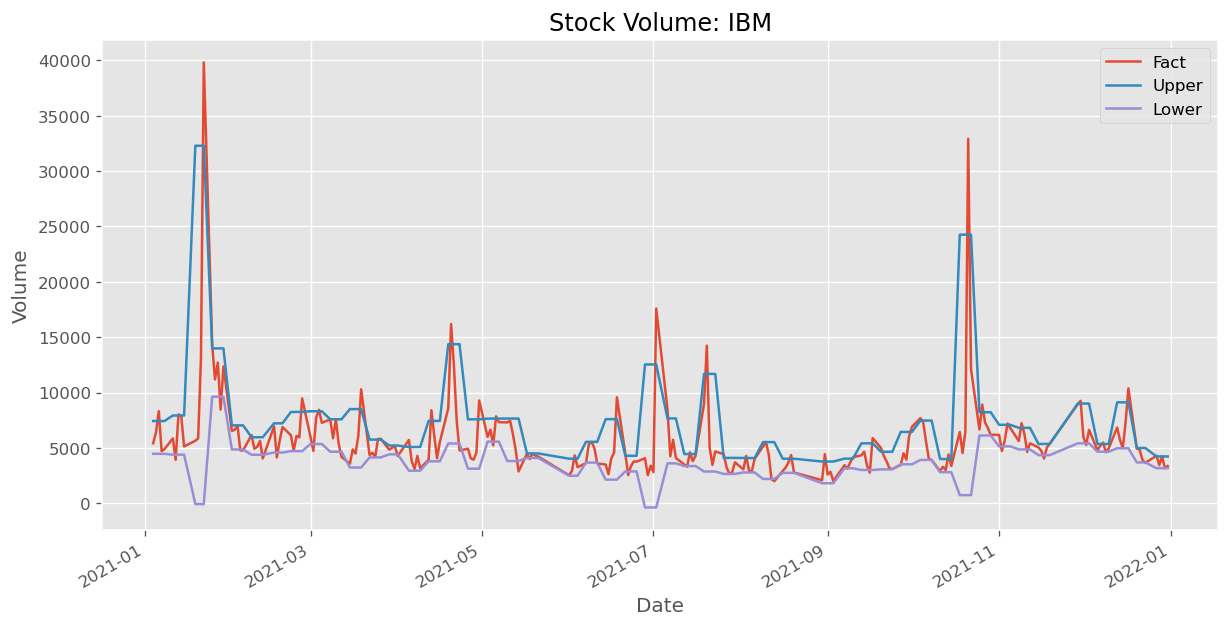

In [5]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

my_stock['Volume'].plot(label='Fact')

upper = my_stock['A_Volume'] + my_stock['S_Volume']
lower = my_stock['A_Volume'] - my_stock['S_Volume']

upper.plot(label='Upper')
lower.plot(label='Lower')

ax.set_title('Stock Volume: IBM')

plt.xlabel('Date')
plt.ylabel('Volume')

plt.legend(loc='best')

plt.show()

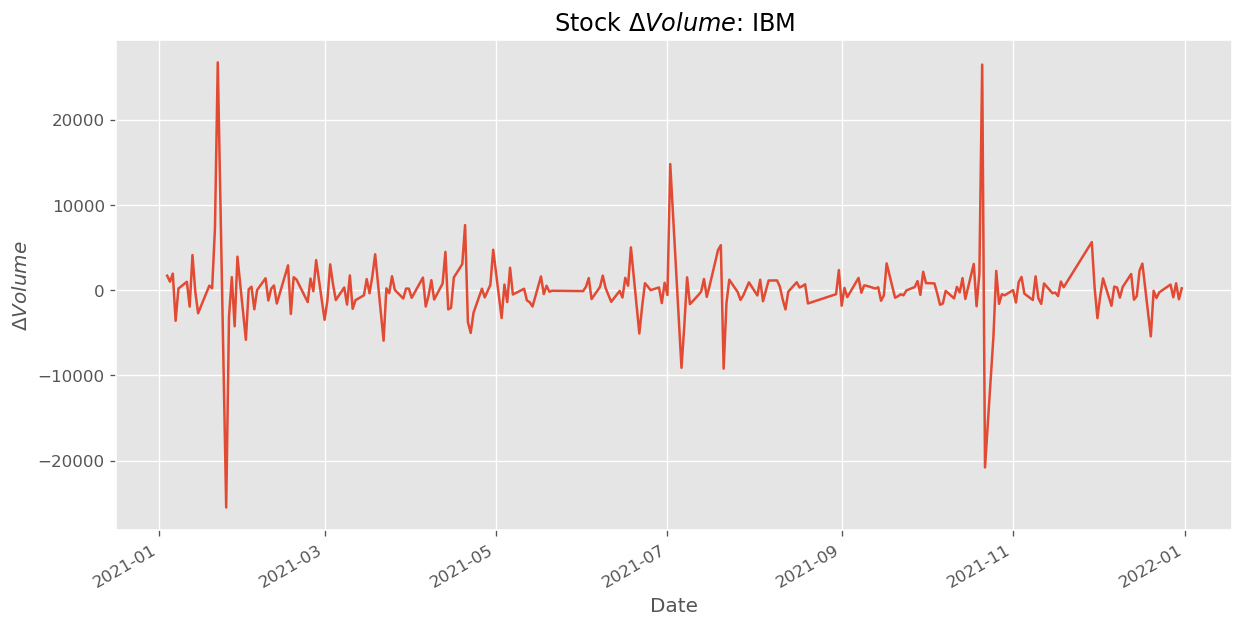

In [6]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

my_stock['D_Volume'].plot() #兩天之間的變化量

ax.set_title('Stock $\Delta {Volume} $: IBM')

plt.xlabel('Date')
plt.ylabel('$\Delta {Volume} $')

plt.show()

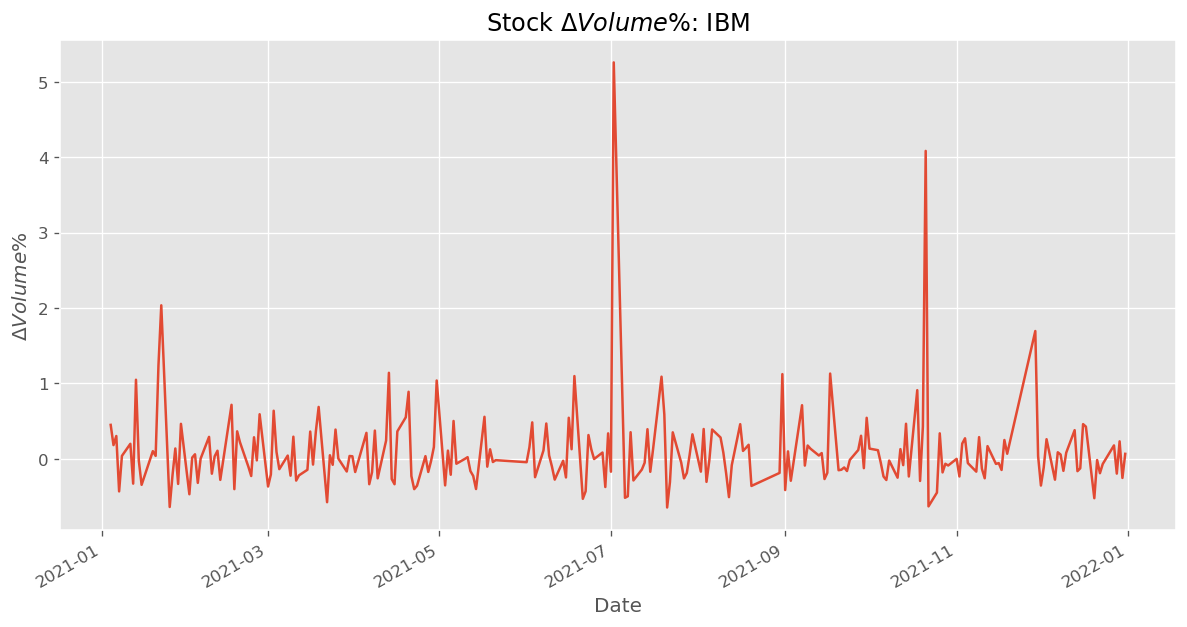

In [17]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

my_stock['P_Volume'].plot()

ax.set_title('Stock $\Delta {Volume} \% $: IBM')

plt.xlabel('Date')
plt.ylabel('$\Delta {Volume} \% $')

plt.show()

<h3>Monte Carlo 模擬</h3>

In [10]:
num_simulations = 10
num_days = my_stock.shape[0] #資料筆數=幾天,238

simulation_df = None

for i in range(num_simulations):
    _my_stock = []
    
    for day in range(num_days): #一天一天看
        row = my_stock.iloc[day]
        
        daily_vol_upper = row['A_Volume'] + row['S_Volume']
        daily_vol_lower = row['A_Volume'] - row['S_Volume']
        
        #在lower和upper之間震盪
        _ibm_volume = np.random.uniform(low=daily_vol_lower, high=daily_vol_upper)
        
        if _ibm_volume <= 0:#若有奇異值
            _ibm_volume = row['Volume']
            
        _my_stock.append(_ibm_volume)
    
    subset = pd.DataFrame(data={'%d' % i: _my_stock.copy() })
    
    if simulation_df is None:
        simulation_df = subset
    else:
        simulation_df = pd.concat([simulation_df, subset], axis=1)
simulation_df

,0,1,2,3,4,5,6,7,8,9
0,4879.352378,5393.599299,5720.466361,6871.999004,5310.724996,5088.537546,7040.079955,4956.113826,4524.025738,6821.527730
1,5405.656501,5958.598511,5627.343355,7080.845254,4540.896767,7156.979713,4883.737426,5487.270370,7232.334863,5354.723876
2,5261.575113,6830.252949,5912.811617,5292.231695,6783.915797,4520.340859,6101.796202,4714.659473,4734.080973,6572.710401
3,7371.356681,4644.040568,5082.246340,5276.288631,5489.733592,5888.303129,6163.706781,6539.467756,4848.746924,4769.325425
4,6689.225986,7264.454340,5078.357375,7311.887692,5028.509856,4632.870279,7332.732146,6853.824016,4547.994635,5669.720720
...,...,...,...,...,...,...,...,...,...,...
233,3763.367064,4153.284504,4112.742179,3480.856493,3990.458282,3464.012176,4154.824364,3696.259269,4194.055023,3962.998289
234,3986.951833,3433.276568,3216.853101,3929.065626,3528.865221,3748.142495,3785.291667,4164.451835,3742.992404,3666.549534
235,3411.880609,3750.760067,3811.342774,3461.249233,3319.772177,3641.980433,3276.268285,3475.234629,3765.949194,3847.979108
236,3668.607763,4122.804887,4088.514170,4116.670199,4104.622992,3716.690200,3518.734039,4133.152097,3504.826791,4008.182088


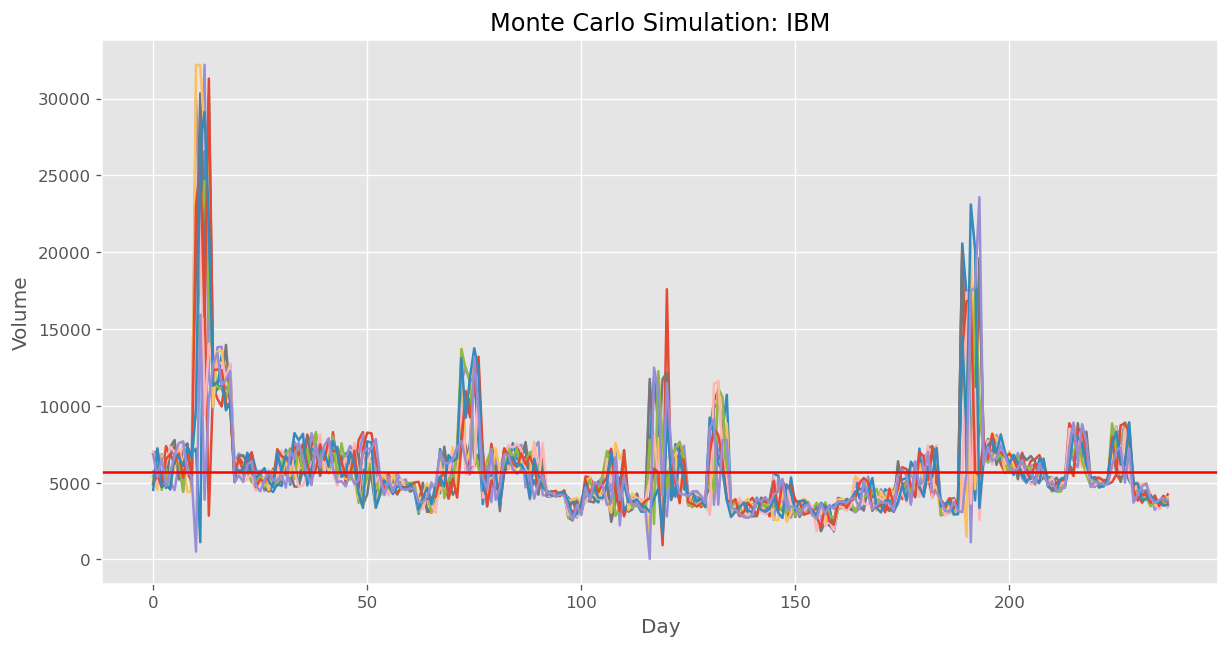

In [11]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

ax.plot(simulation_df)
ax.axhline(y=my_stock['A_Volume'].mean(), color = 'r', linestyle = '-')

ax.set_title('Monte Carlo Simulation: IBM')

plt.xlabel('Day')
plt.ylabel('Volume')

plt.show()